In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout

In [2]:
x_train = np.array(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/x_train.csv"))
x_test = np.array(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/x_test.csv"))
y_train = np.array(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/y_train.csv"))
y_test = np.array(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/y_test.csv"))

In [3]:
np.random.seed(42)

x_train = x_train/255
x_test = x_test/255

x_train= x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28,28,1))

In [4]:
model = Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, activation='relu', padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64, (3, 3), strides = 1, activation='relu', padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(Dense(64, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.25))

model.add(Dense(5, activation='softmax'))

model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [5]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

model.fit(x_train, y_train, epochs = 100, batch_size = 128, validation_split = 0.2, callbacks=[early_stopping])

encoder_model = Model(inputs=model.input, outputs=model.layers[-4].output)
encoder_output = encoder_model.predict(x_test)

Epoch 1/100
375/375 [==============================] - 95s 247ms/step - loss: 0.4303 - accuracy: 0.8432 - val_loss: 0.8165 - val_accuracy: 0.6815
Epoch 2/100
375/375 [==============================] - 91s 244ms/step - loss: 0.2810 - accuracy: 0.8977 - val_loss: 0.2368 - val_accuracy: 0.9140
Epoch 3/100
375/375 [==============================] - 96s 255ms/step - loss: 0.2417 - accuracy: 0.9132 - val_loss: 0.2150 - val_accuracy: 0.9232
Epoch 4/100
375/375 [==============================] - 92s 245ms/step - loss: 0.2208 - accuracy: 0.9205 - val_loss: 0.2216 - val_accuracy: 0.9184
Epoch 5/100
375/375 [==============================] - 92s 245ms/step - loss: 0.2089 - accuracy: 0.9245 - val_loss: 0.1980 - val_accuracy: 0.9302
Epoch 6/100
375/375 [==============================] - 94s 251ms/step - loss: 0.1975 - accuracy: 0.9289 - val_loss: 0.1846 - val_accuracy: 0.9341
Epoch 7/100
375/375 [==============================] - 95s 254ms/step - loss: 0.1845 - accuracy: 0.9344 - val_loss: 0.2186 -

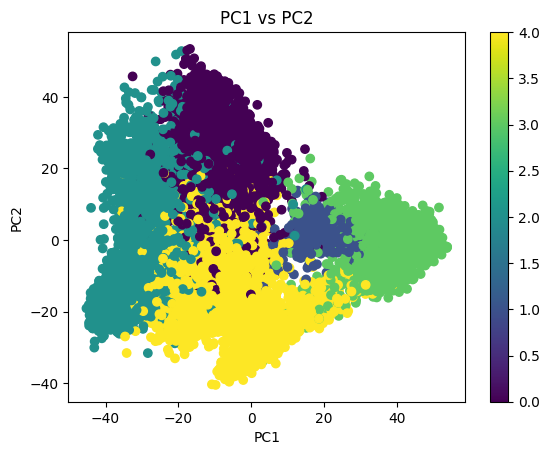

In [6]:
# Perform PCA on the encoded data
pca = PCA(n_components=2)
pca_output = pca.fit_transform(encoder_output)

# Visualize the encoded data
plt.scatter(pca_output[:, 0], pca_output[:, 1], c=y_test)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')
plt.colorbar()
plt.show()

In [7]:
# DBSCAN
dbscan = DBSCAN(eps=38, min_samples=70)
dbscan_labels = dbscan.fit_predict(encoder_output)

# K-means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(encoder_output)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


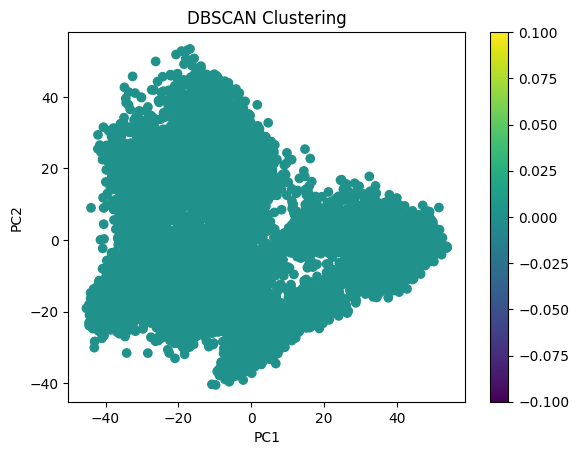

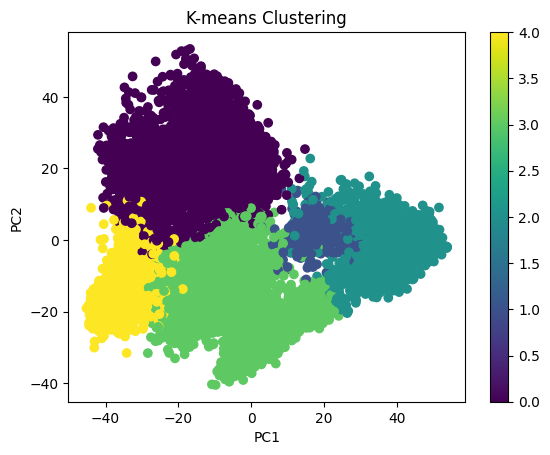

In [8]:
# Create a scatter plot of the first two principal components
plt.scatter(pca_output[:, 0], pca_output[:, 1], c=dbscan_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering')
plt.colorbar()
plt.show()

# Create a scatter plot of the first two principal components
plt.scatter(pca_output[:, 0], pca_output[:, 1], c=kmeans_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')
plt.colorbar()
plt.show()

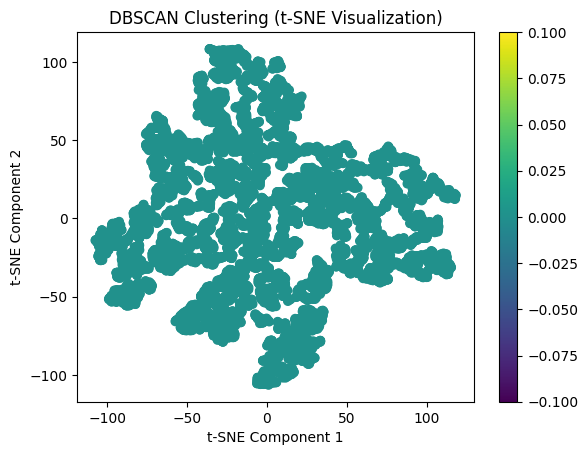

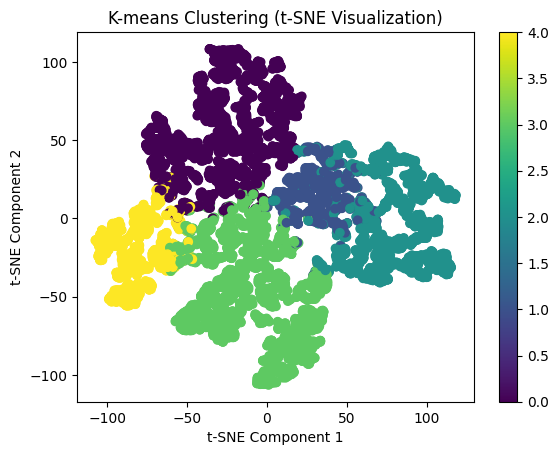

In [9]:
# Create a t-SNE embedding of the PCA-reduced data
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
x_test_tsne = tsne.fit_transform(pca_output)

# Visualize the DBSCAN clustering results
plt.scatter(x_test_tsne[:, 0], x_test_tsne[:, 1], c=dbscan_labels)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('DBSCAN Clustering (t-SNE Visualization)')
plt.colorbar()
plt.show()

# Visualize the K-means clustering results
plt.scatter(x_test_tsne[:, 0], x_test_tsne[:, 1], c=kmeans_labels)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('K-means Clustering (t-SNE Visualization)')
plt.colorbar()
plt.show()

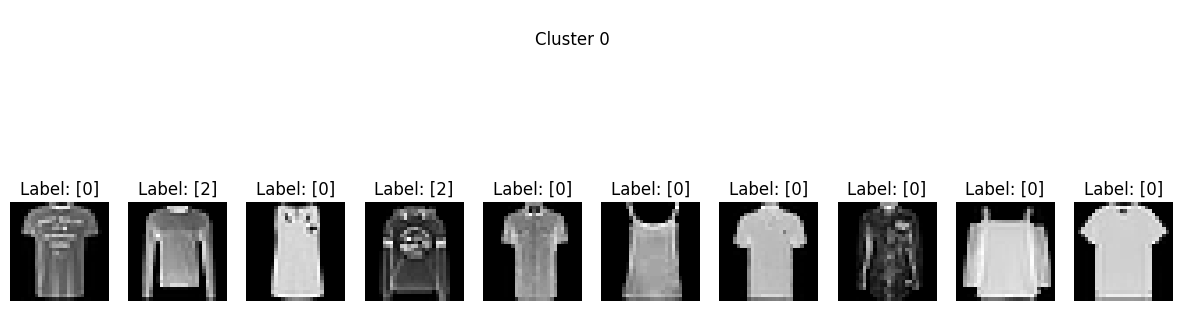

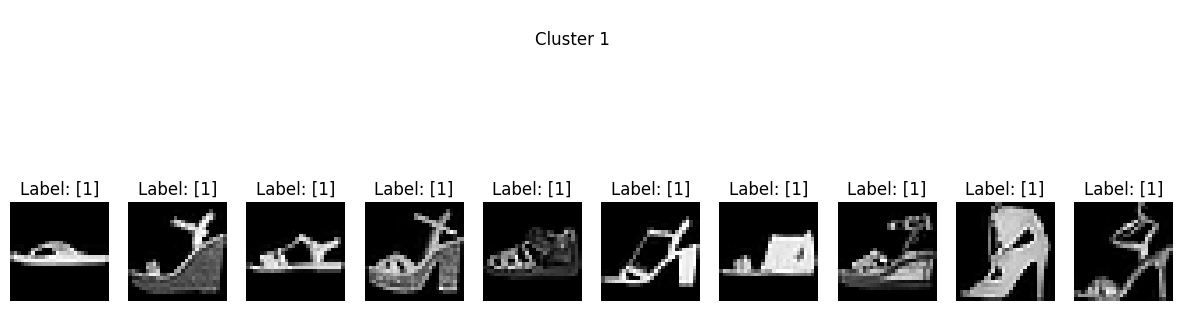

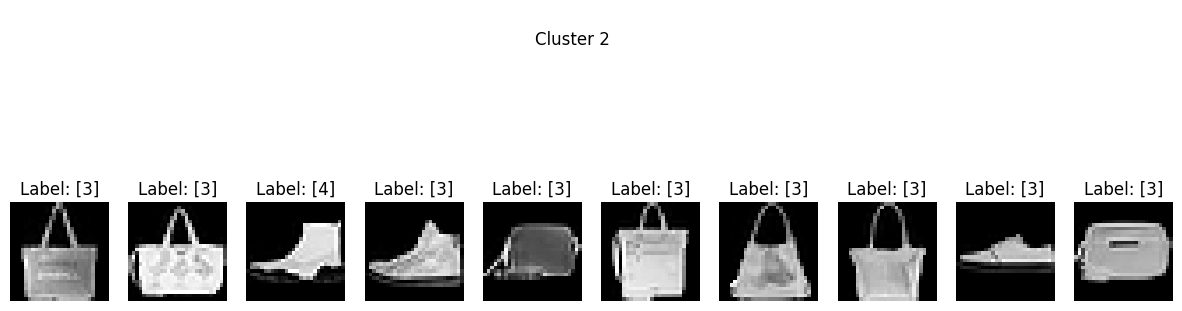

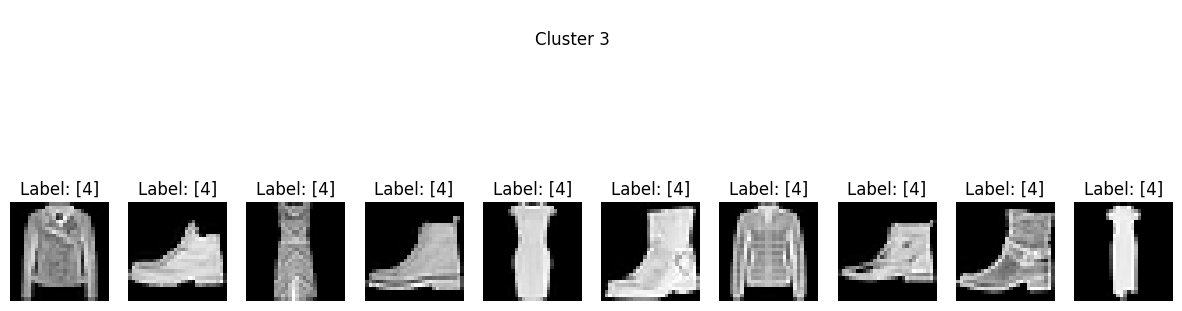

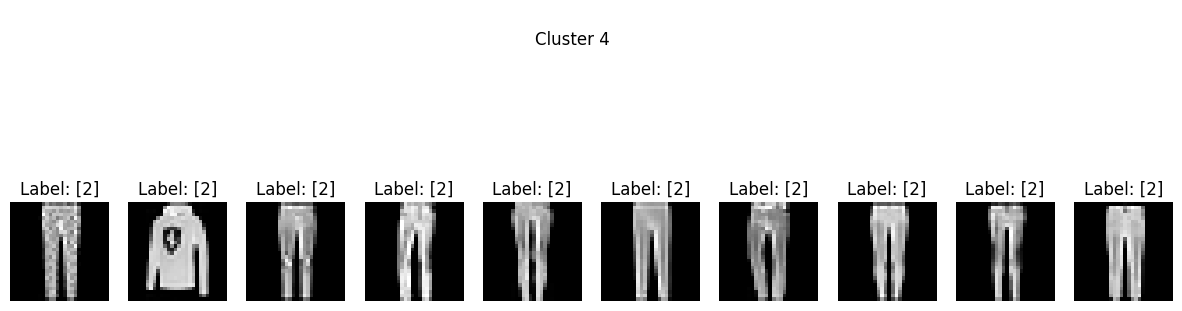

In [10]:
import random

# Define the number of images to display from each cluster
num_display_images = 10

# Get the labels for the original images
labels = y_test

# Display a random selection of images from each cluster
for cluster in set(kmeans_labels):
    # Get the indices of images in the current cluster
    cluster_indices = np.where(kmeans_labels == cluster)[0]
    # Randomly select a subset of images from the cluster
    display_indices = random.sample(list(cluster_indices), num_display_images)
    
    # Display the images and their label values
    fig, axs = plt.subplots(1, num_display_images, figsize=(15, 5))
    fig.suptitle('\nCluster ' + str(cluster))
    for i, idx in enumerate(display_indices):
        axs[i].imshow(x_test[idx], cmap='gray')
        axs[i].axis('off')
        axs[i].set_title('Label: ' + str(labels[idx]))
    plt.show()